In [1]:
import time
import random
import os
import cv2
import numpy as np
import pandas as pd
import gc

from PIL import Image
from openslide import OpenSlide, OpenSlideUnsupportedFormatError

from WSIAnalysis.patch_extraction.extract_patches import \
read_wsi, construct_colored_wsi, get_contours, segmentation_hsv, \
construct_bags, save_to_disk, extract_

In [2]:
'''
    Global
'''
PATCH_SIZE = 500
CHANNEL = 3

THRESH = 90

PIXEL_WHITE = 255
PIXEL_TH = 200
PIXEL_BLACK = 0

level = 3
mag_factor = pow(2, level)

### Dataset
Here we are using dataset from [Camelyon 2017 Grand Challenge](camelyon17.grand-challenge.org) as an example.

### Final result
In the image below, red boxes are extracted patches.

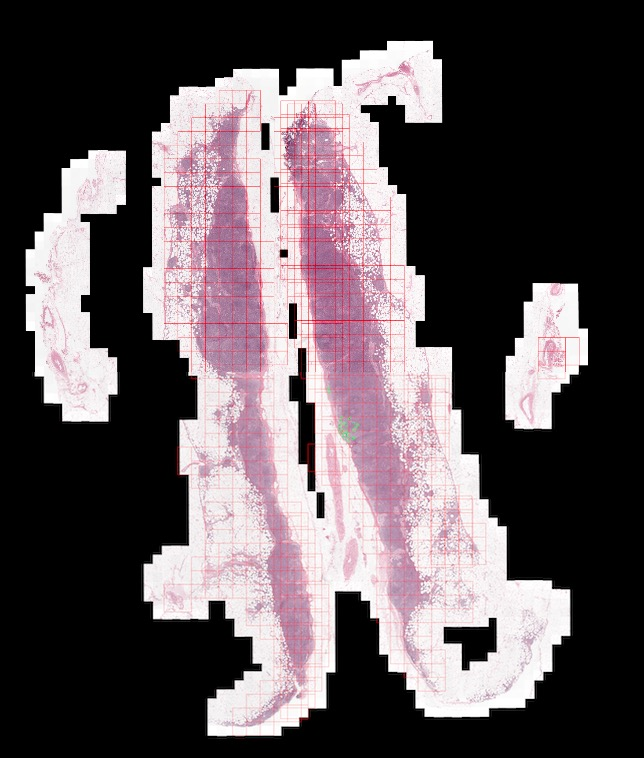

### Patch extraction procedure
Sample slide: patient_009_node_1

In [3]:
dir_prefix='./dataset_patches/' 
dir_end='/level3/patches/'

dataset_path='../data-wsi/camelyon17/training/'
anno_path = '../data-wsi/camelyon17/lesion_annotations/'

slideEnd='.tif'
annoEnd='.xml'

slide2_ = 'patient_009_node_1'

### Load WSI into memory
level3: 5x magnification (40x is the original setting)

In [4]:
slide_file=dataset_path + slide2_ + slideEnd

wsi, rgba, shape = read_wsi(slide_file, level)

width, height: (11871, 26322)
transformed: (26322, 11871, 4)
Time spent on loading ../data-wsi/camelyon17/training/patient_009_node_1.tif :  17.365020751953125


The transformed output: (26322, 11871, 4), arises from the fact that: <br>
np.asarray() / np.array() would switch the position of WIDTH and HEIGHT in shape.

### Change color space
Here we get **rgb**, **gray** and **hsv** version of the WSI.<br>
The returned variables are all **numpy arrays**.

In [5]:
wsi_rgb_, wsi_gray_, wsi_hsv_ = construct_colored_wsi(rgba)

print('Transformed shape: (height, width, channel)')
print("WSI HSV shape: ", wsi_hsv_.shape)
print("WSI BGR shape: ", wsi_rgb_.shape)
print("WSI GRAY shape: ", wsi_gray_.shape)
print('\n')

Transformed shape: (height, width, channel)
WSI HSV shape:  (26322, 11871, 3)
WSI BGR shape:  (26322, 11871, 3)
WSI GRAY shape:  (26322, 11871)




### Free up memory

In [6]:
'''
rgba array is no longer necessary here.
'''

del rgba

gc.collect()

7

### Segmentation
Here we use the hsv array to perform segmentation.<br>
And only the **contours** and **mask** will be passed to the next function to extract patches.

In [7]:
bounding_boxes, contour_coords, contours, mask \
= segmentation_hsv(wsi_hsv_, wsi_rgb_)

HSV segmentation: 
thresh shape: (26322, 11871)
Closing step: 
image_close size (26322, 11871)
Openning step: 
image_open size 312468462
Getting Contour: 
contour image:  (26322, 11871)
mask shape (26322, 11871, 3)


##### Sample of contours:
In the next step, we will extract patches from these selected regions(contours).

In [8]:
print("Number of contours:", len(contour_coords))
print("Contour shape: ", contour_coords[1].shape)
print(contour_coords[1])

Number of contours: 4304
Contour shape:  (11, 2)
[[ 4015 23406]
 [ 4015 23410]
 [ 4016 23411]
 [ 4016 23413]
 [ 4017 23413]
 [ 4018 23414]
 [ 4023 23414]
 [ 4024 23415]
 [ 4024 23416]
 [ 4028 23416]
 [ 4028 23406]]


### Extract Patches

**Experiment setting**:<br>level3 (5x magnification)<br>patch size: (500, 500, 3)<br>step size: 250<br>Select patches from the **top 5 largest** regions (major regions)

In [9]:
patches, patches_coords = construct_bags(wsi, wsi_rgb_, contours, mask, \
                                         level, mag_factor, PATCH_SIZE)

region 0
ROI length: 13 44
read_region (scaled coordinates):  5182 12061
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
5182 12061
Saved

read_region (scaled coordinates):  5432 12061
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
5432 12061
Saved

read_region (scaled coordinates):  5682 12061
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
5682 12061
Saved

read_region (scaled coordinates):  5932 12061
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  6182 12061
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  6432 12061
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  6682 12061
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  6932 12061
Numpy mask shape:  (500, 5

Did not save

read_region (scaled coordinates):  6682 20811
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  6932 20811
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
6932 20811
Saved

read_region (scaled coordinates):  7182 20811
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
7182 20811
Saved

read_region (scaled coordinates):  7432 20811
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
7432 20811
Saved

read_region (scaled coordinates):  7682 20811
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
7682 20811
Saved

read_region (scaled coordinates):  7932 20811
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
7932 20811
Saved

read_region (scaled coordinates):  8182 20811
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
8182 20811
Saved

read_region (scaled coordinates):  5182 21061
Numpy mask shape:  (500, 50

4809 18367
Saved

read_region (scaled coordinates):  5059 18367
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  5309 18367
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  5559 18367
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  5809 18367
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
5809 18367
Saved

read_region (scaled coordinates):  3059 18617
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  3309 18617
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
Did not save

read_region (scaled coordinates):  3559 18617
Numpy mask shape:  (500, 500, 3)
Numpy patch shape:  (500, 500, 3)
3559 18617
Saved

read_region (scaled coordinates):  3809 18617
Numpy mask shape:  (500, 500, 3)
Numpy 

#### Patch sample

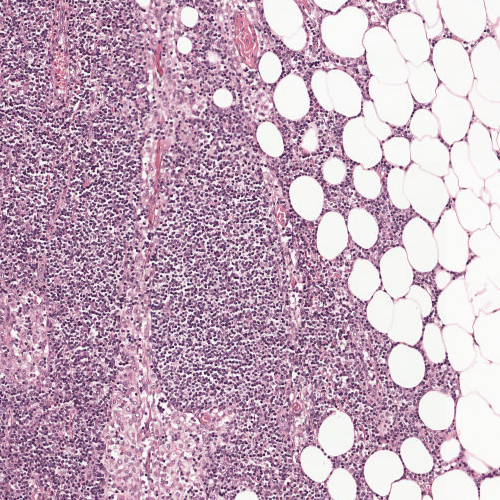

In [10]:
Image.fromarray(patches[100])

In [11]:
print("first 10 coords: \n", patches_coords[:10])

first 10 coords: 
 [(5182, 12061), (5432, 12061), (5682, 12061), (5182, 12311), (5432, 12311), (5682, 12311), (5932, 12311), (5182, 12561), (5432, 12561), (5682, 12561)]


### Save to disk

In [12]:
save_to_disk(patches, patches_coords, mask, slide2_, level)

Path:  ./dataset_patches/patient_009_node_1/level3/patches/patch_
Path:  ./dataset_patches/patient_009_node_1/level3/patch_coords.csv
Path:  ./dataset_patches/patient_009_node_1/level3/mask
Number of patches:  574
[(5182, 12061), (5432, 12061), (5682, 12061), (5182, 12311), (5432, 12311)]


We have saved: <br>
1. Single patches in **npy, jpeg format**;
2. Whole WSI in one numpy array;
3. Mask file in **npy** format;
4. Patch coordinates in **csv** format;

### Visualization
extracted patches

In [13]:
wsi_arr=np.array(wsi_rgb_)

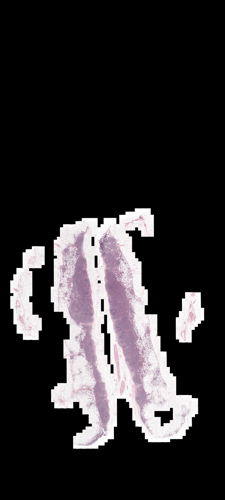

In [14]:
i_=Image.fromarray(np.asarray(wsi_rgb_))
i_.thumbnail((500, 500))
i_

In [27]:
w=int(PATCH_SIZE)
h=int(PATCH_SIZE)

for pos_ in patches_coords:
    
    scaled_x=int(pos_[0])
    scaled_y=int(pos_[1])
    
    cv2.rectangle(wsi_arr, \
                 (scaled_x, scaled_y), (scaled_x+w, scaled_y+h),\
                 (PIXEL_WHITE, PIXEL_BLACK, PIXEL_BLACK, PIXEL_WHITE), 4)

img_sample = Image.fromarray(wsi_arr[:,:,:3])

img_save = Image.fromarray(wsi_arr[:,:,:3])
img_save.save('./slide2_patches.jpeg')

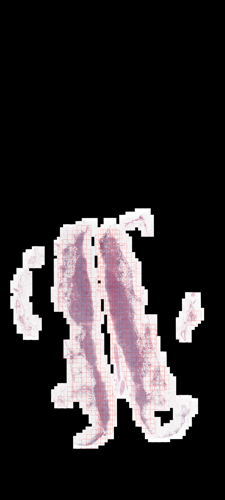

In [28]:
img_sample.thumbnail((500, 500))
img_sample

Annotated areas

In [17]:
import xml.etree.cElementTree as ET

In [18]:
tree = ET.ElementTree(file=anno_path+slide2_+annoEnd)

In [80]:
anno_ = list()

for an_i, crds in enumerate(tree.iter(tag='Coordinates')):
    tmp = list()
    for coord in crds:
        x = int(float(coord.attrib['X'])) // mag_factor
        y = int(float(coord.attrib['Y'])) // mag_factor
        tmp.append((x, y))
        
    anno_.append(tmp)

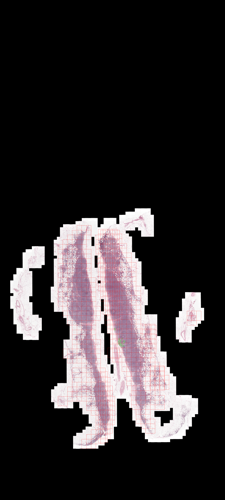

In [87]:
anno_arr = list()

for contour in anno_:
    
    arr = np.array(contour)
    arr = np.expand_dims(arr, axis=1)
    anno_arr.append(np.array(arr))
    
_=cv2.drawContours(wsi_arr, anno_arr, -1, \
                  (PIXEL_BLACK, PIXEL_WHITE, PIXEL_BLACK, PIXEL_WHITE),thickness=6)

img_save_ = Image.fromarray(wsi_arr[:,:,:3])
img_save_.save('./slide2_patches_.jpeg')

img_sample_ = Image.fromarray(wsi_arr[:,:,:3])
img_sample_.thumbnail((500, 500))
img_sample_